# Marketing Spend Effectiveness Analysis Using Statistical Techniques

* This project explores the effectiveness of various marketing channels using a comprehensive campaign performance dataset (~200,000 records). The focus is on uncovering statistically significant differences in conversion rates, click-through rates (CTR), and cost-efficiency across multiple channels such as Social, Email, and Search.

# Tools & Libraries Used
* Python
* Pandas
* Numpy
* Matplotlib
* Seaborn
* Jupyter Notebook
* Scipy

## 1. Import Libraries + Load Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
from scipy import stats

In [5]:
df = pd.read_csv(r'C:\Users\Win10\Documents\Python Code\Marketing Campaign Performance\marketing_campaign.csv')

In [6]:
df

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199996,TechCorp,Display,All Ages,30 days,Google Ads,0.06,"$18,365.00",2.84,Chicago,German,858,5988,1,Tech Enthusiasts,2021-12-07
199996,199997,DataTech Solutions,Email,Men 25-34,15 days,Facebook,0.02,"$8,168.00",4.14,Chicago,Spanish,228,3068,7,Foodies,2021-12-08
199997,199998,DataTech Solutions,Social Media,Men 18-24,45 days,Website,0.05,"$13,397.00",3.25,New York,Mandarin,723,9548,3,Tech Enthusiasts,2021-12-09
199998,199999,Innovate Industries,Influencer,All Ages,30 days,YouTube,0.10,"$18,508.00",3.86,Houston,French,528,2763,1,Foodies,2021-12-10


## 2. Data Cleaning & Exploratory Data Analysis

In [26]:
# checking column names & data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Campaign_ID       200000 non-null  int64         
 1   Company           200000 non-null  object        
 2   Campaign_Type     200000 non-null  object        
 3   Target_Audience   200000 non-null  object        
 4   Duration          200000 non-null  object        
 5   Channel_Used      200000 non-null  object        
 6   Conversion_Rate   200000 non-null  float64       
 7   Acquisition_Cost  200000 non-null  float64       
 8   ROI               200000 non-null  float64       
 9   Location          200000 non-null  object        
 10  Language          200000 non-null  object        
 11  Clicks            200000 non-null  int64         
 12  Impressions       200000 non-null  int64         
 13  Engagement_Score  200000 non-null  int64         
 14  Cust

In [14]:
# checking for null values
df.isnull().sum()

Campaign_ID         0
Company             0
Campaign_Type       0
Target_Audience     0
Duration            0
Channel_Used        0
Conversion_Rate     0
Acquisition_Cost    0
ROI                 0
Location            0
Language            0
Clicks              0
Impressions         0
Engagement_Score    0
Customer_Segment    0
Date                0
dtype: int64

In [15]:
# checking for duplicate values
df.duplicated().sum()

0

In [27]:
# summary of the dataset
df.describe()

,Campaign_ID,Conversion_Rate,Acquisition_Cost,ROI,Clicks,Impressions,Engagement_Score,Date
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000
mean,100000.500000,0.080070,12504.393040,5.002438,549.772030,5507.301520,5.494710,2021-07-01 23:35:09.600000
min,1.000000,0.010000,5000.000000,2.000000,100.000000,1000.000000,1.000000,2021-01-01 00:00:00
25%,50000.750000,0.050000,8739.750000,3.500000,325.000000,3266.000000,3.000000,2021-04-02 00:00:00
50%,100000.500000,0.080000,12496.500000,5.010000,550.000000,5517.500000,5.000000,2021-07-02 00:00:00
75%,150000.250000,0.120000,16264.000000,6.510000,775.000000,7753.000000,8.000000,2021-10-01 00:00:00
max,200000.000000,0.150000,20000.000000,8.000000,1000.000000,10000.000000,10.000000,2021-12-31 00:00:00
std,57735.171256,0.040602,4337.664545,1.734488,260.019056,2596.864286,2.872581,NaN


In [17]:
# overview of unique channels used for marketing
df['Channel_Used'].unique()

array(['Google Ads', 'YouTube', 'Instagram', 'Website', 'Facebook',
       'Email'], dtype=object)

In [18]:
# number of campaigns executed for each channel
df['Channel_Used'].value_counts()

Channel_Used
Email         33599
Google Ads    33438
YouTube       33392
Instagram     33392
Website       33360
Facebook      32819
Name: count, dtype: int64

In [20]:
# converting date column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

In [21]:
# removing dollar sign from acquisition cost for performing numeric calculations
df['Acquisition_Cost'] = df['Acquisition_Cost'].str.replace(r'[\$,]', '', regex=True).astype(float)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Campaign_ID       200000 non-null  int64         
 1   Company           200000 non-null  object        
 2   Campaign_Type     200000 non-null  object        
 3   Target_Audience   200000 non-null  object        
 4   Duration          200000 non-null  object        
 5   Channel_Used      200000 non-null  object        
 6   Conversion_Rate   200000 non-null  float64       
 7   Acquisition_Cost  200000 non-null  float64       
 8   ROI               200000 non-null  float64       
 9   Location          200000 non-null  object        
 10  Language          200000 non-null  object        
 11  Clicks            200000 non-null  int64         
 12  Impressions       200000 non-null  int64         
 13  Engagement_Score  200000 non-null  int64         
 14  Cust

In [22]:
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,16174.0,6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,11566.0,5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,10200.0,7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,12724.0,5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,16452.0,6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05


In [24]:
df['Campaign_Type'].unique()

array(['Email', 'Influencer', 'Display', 'Search', 'Social Media'],
      dtype=object)

In [25]:
df['Campaign_Type'].value_counts()

Campaign_Type
Influencer      40169
Search          40157
Display         39987
Email           39870
Social Media    39817
Name: count, dtype: int64

In [39]:
# splitting the column of target audience for better analyzation
df[['Gender', 'Age_Group']] = df['Target_Audience'].str.extract(r'(Men|Women)?\s*(\d{2}-\d{2}|All Ages)', expand=True)

# filling the missing values
df['Gender'] = df['Gender'].fillna('All')
df['Age_Group'] = df['Age_Group'].fillna('All Ages')

In [40]:
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,Gender,Age_Group
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,16174.0,6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01,Men,18-24
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,11566.0,5.61,New York,German,116,7523,7,Fashionistas,2021-01-02,Women,35-44
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,10200.0,7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03,Men,25-34
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,12724.0,5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04,All,All Ages
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,16452.0,6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05,Men,25-34


## 3. Univariate Analysis - Descriptive Statistics

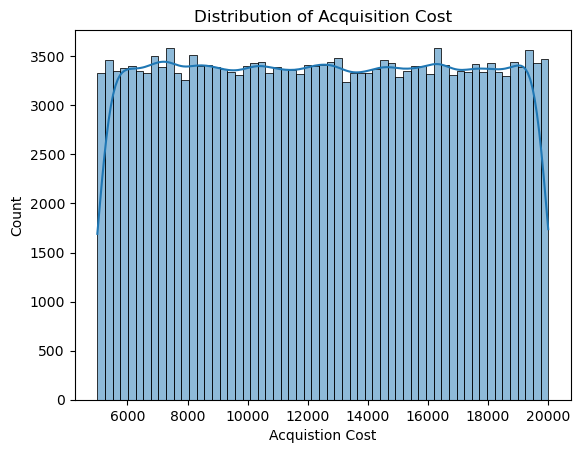

In [30]:
# distribution plot of acquisition costs
sns.histplot(x=df['Acquisition_Cost'], kde=True)
plot.title('Distribution of Acquisition Cost')
plot.xlabel('Acquistion Cost')
plot.show()

Text(0.5, 0, 'Acquistion Cost')

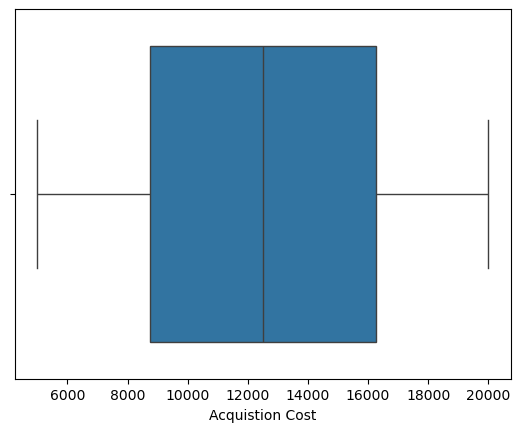

In [32]:
# boxplot of acquisition cost
sns.boxplot(x=df['Acquisition_Cost'])
plot.xlabel('Acquistion Cost')

In [34]:
# calculating central tendency and spread
print('Mean:', df['Acquisition_Cost'].mean())
print('Median:', df['Acquisition_Cost'].median())
print('Mode:', df['Acquisition_Cost'].mode())
print('Standard Deviation:', df['Acquisition_Cost'].std())

Mean: 12504.39304
Median: 12496.5
Mode: 0    16578.0
Name: Acquisition_Cost, dtype: float64
Standard Deviation: 4337.664544973273


Text(0.5, 0, 'Campaign Type')

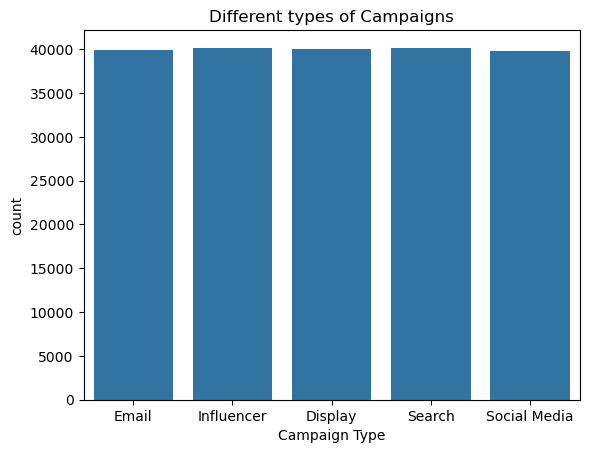

In [36]:
# bar plot for campaign type
sns.countplot(x=df['Campaign_Type'])
plot.title('Different types of Campaigns')
plot.xlabel('Campaign Type')

Text(0.5, 0, 'Channels')

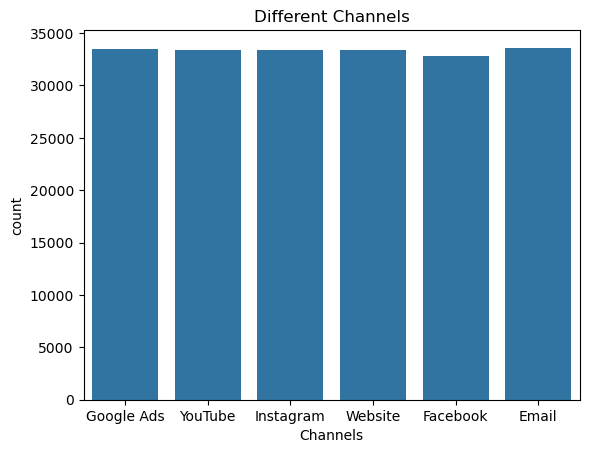

In [37]:
# bar plot for channel used
sns.countplot(x=df['Channel_Used'])
plot.title('Different Channels')
plot.xlabel('Channels')

Text(0.5, 0, 'Conversion Rate')

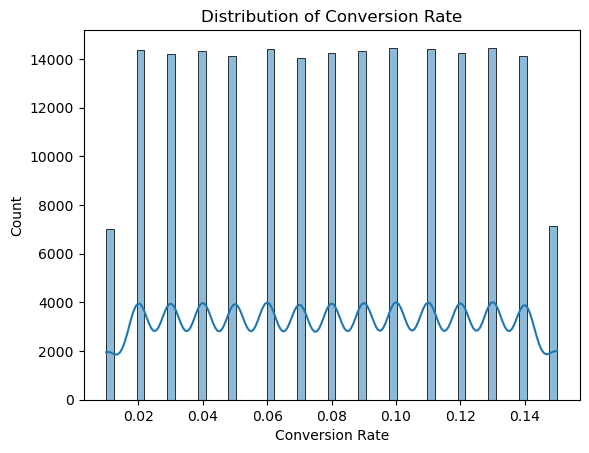

In [46]:
# distribution of conversion rate
sns.histplot(x=df['Conversion_Rate'], kde=True)
plot.title('Distribution of Conversion Rate')
plot.xlabel('Conversion Rate')

Text(0.5, 0, 'Conversion Rate')

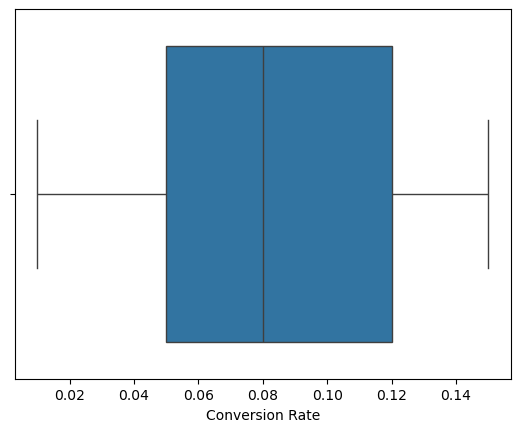

In [47]:
# boxplot of conversion rate
sns.boxplot(x=df['Conversion_Rate'])
plot.xlabel('Conversion Rate')

Text(0.5, 0, 'ROI')

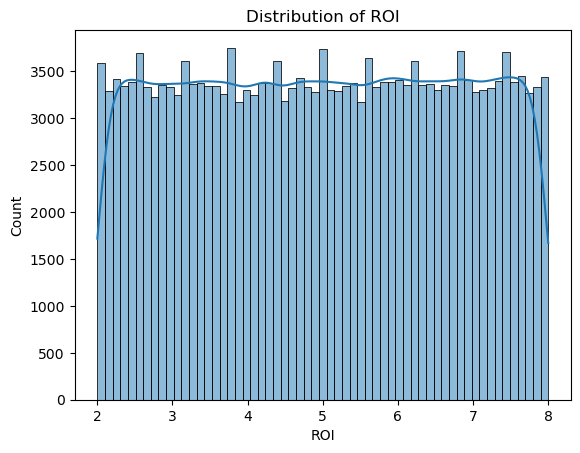

In [48]:
# distribution of ROI
sns.histplot(x=df['ROI'], kde=True)
plot.title('Distribution of ROI')
plot.xlabel('ROI')

Text(0.5, 0, 'ROI')

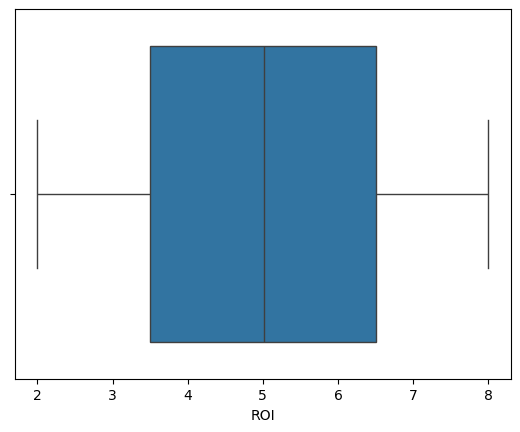

In [49]:
# boxplot of ROI
sns.boxplot(x=df['ROI'])
plot.xlabel('ROI')

In [51]:
# creating few more columns for aggregated KPIs

df['Conversions'] = df['Clicks']*df['Conversion_Rate']
df['Click_Through_Rate'] = df['Clicks']/df['Impressions']
df['Cost_Per_Click'] = df['Acquisition_Cost']/df['Clicks']

In [52]:
df['Cost_Per_Acquisition'] = df['Acquisition_Cost']/df['Conversions']

In [53]:
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,...,Impressions,Engagement_Score,Customer_Segment,Date,Gender,Age_Group,Conversions,Click_Through_Rate,Cost_Per_Click,Cost_Per_Acquisition
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,16174.0,6.29,Chicago,...,1922,6,Health & Wellness,2021-01-01,Men,18-24,20.24,0.263267,31.964427,799.110672
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,11566.0,5.61,New York,...,7523,7,Fashionistas,2021-01-02,Women,35-44,13.92,0.015419,99.706897,830.890805
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,10200.0,7.18,Los Angeles,...,7698,1,Outdoor Adventurers,2021-01-03,Men,25-34,40.88,0.075864,17.465753,249.510763
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,12724.0,5.55,Miami,...,1820,7,Health & Wellness,2021-01-04,All,All Ages,23.87,0.119231,58.635945,533.054043
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,16452.0,6.50,Los Angeles,...,4201,3,Health & Wellness,2021-01-05,Men,25-34,18.95,0.090217,43.408971,868.179420


## 4. Bivariate Analysis

In [114]:
# average conversion rate per channel

channel_ctr = df.groupby('Channel_Used')['Conversion_Rate'].mean()

Channel_Used
Email         0.080282
Facebook      0.079992
Google Ads    0.080183
Instagram     0.079886
Website       0.080183
YouTube       0.079889
Name: Conversion_Rate, dtype: float64

Text(0, 0.5, '')

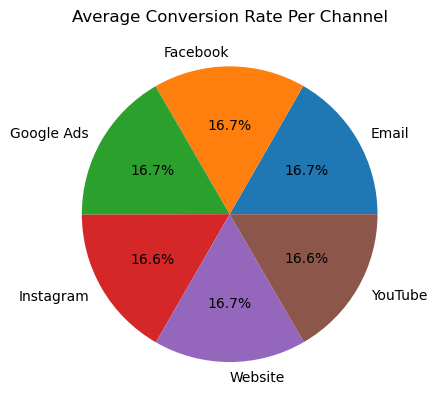

In [116]:
channel_ctr.plot(kind='pie',
                 autopct='%0.1f%%')
plot.title('Average Conversion Rate Per Channel')
plot.ylabel('')

### Insights:
* The average conversion rate is same across each channels which is around 16.6% to 16.7%

<Axes: xlabel='Acquisition_Cost', ylabel='ROI'>

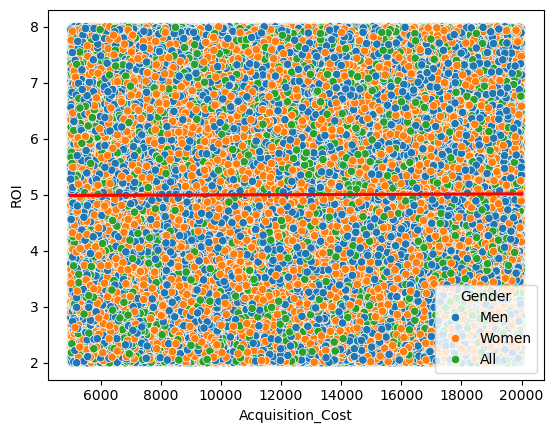

In [57]:
# analyzing whether spending more on acquisition cost leads to higher ROI

sns.scatterplot(x='Acquisition_Cost', y='ROI', hue='Gender', data=df)
sns.regplot(x='Acquisition_Cost', y='ROI', data=df, scatter=False, color='red')

### Insights:
* We visualized the relationship between acquisition spending and ROI using a scatter plot with gender segmentation and a regression line.
* The regression line was nearly flat, and the correlation was weak, indicating no strong linear relationship between Acquisition Cost and ROI.
* This suggests that spending more does not necessarily lead to better ROI and campaign success may depend more on targeting strategy or campaign quality.

Text(0.5, 1.0, 'ROI Distribution by Gender')

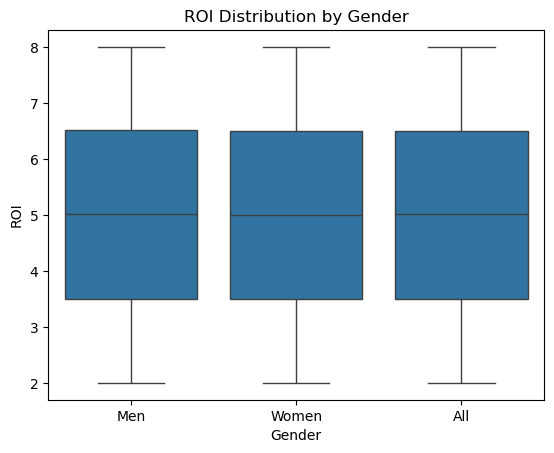

In [59]:
# analyzing ROI by gender

sns.boxplot(x='Gender', y='ROI', data=df)
plot.title('ROI Distribution by Gender')

In [60]:
# group wise statistics
df.groupby('Gender')['ROI'].agg(['count', 'mean', 'median', 'std', 'max', 'min'])

,count,mean,median,std,max,min
Gender,,,,,,
All,40019,5.005174,5.01,1.732876,8.0,2.0
Men,80281,5.001685,5.01,1.736265,8.0,2.0
Women,79700,5.001822,5.00,1.733527,8.0,2.0


### Insights:
* ROI appears to be equal for each group of gender.
* As per group wise statistics, the mean, median, std, max and min for ROI appears to be the same even though the count of men is a bit higher than that of women.
* This interprets there was an equal return on investment  for the campaigns for each group of Men and Women.

Text(0.5, 1.0, 'ROI Distribution by Age Group')

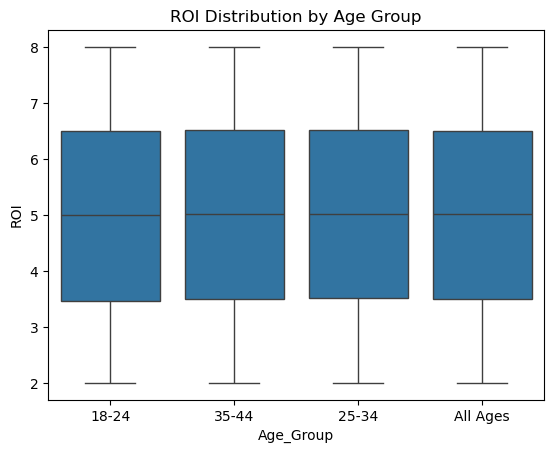

In [64]:
# analyzing ROI by age groups

sns.boxplot(x='Age_Group', y='ROI', data=df)
plot.title('ROI Distribution by Age Group')

In [63]:
# group wise statistics
df.groupby('Age_Group')['ROI'].agg(['count', 'mean', 'median', 'std', 'max', 'min'])

,count,mean,median,std,max,min
Age_Group,,,,,,
18-24,40258,4.982853,4.99,1.736688,8.0,2.0
25-34,80036,5.008991,5.01,1.732803,8.0,2.0
35-44,39687,5.006330,5.01,1.737198,8.0,2.0
All Ages,40019,5.005174,5.01,1.732876,8.0,2.0


### Insights:
* ROI appears to be equal for each age groups.
* As per group wise statistics, though, the number of people in the age group of 25-34 is almost double of the other age groups but the mean, median and other parameters appears to be the same.
* This also shows that the campaigns were majorly targetted to the age group of 25-34 or the age group 25-34 responded well to these campaigns showing greater interest as compared to the other age groups.

<Axes: xlabel='Clicks', ylabel='Conversion_Rate'>

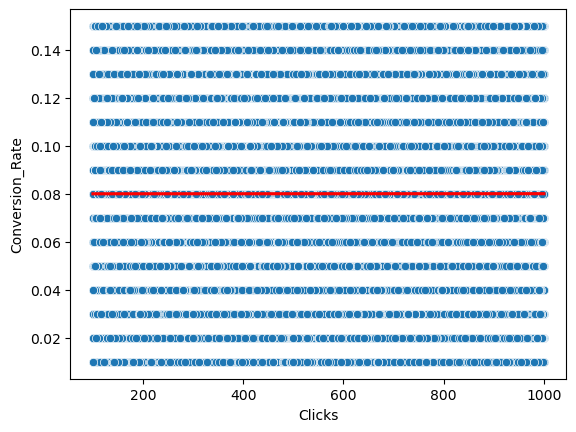

In [66]:
# analyzing whether higher clicks leads to more purchases

sns.scatterplot(x='Clicks', y='Conversion_Rate', data=df)
sns.regplot(x='Clicks', y='Conversion_Rate', data=df, scatter=False, color='red')

### Insights:
* The scatter plot shows that there is no strong or visible correlation between number of clicks and conversion rate.
* The regression line at 0.08 implies that most conversion rates center around 8% regardless of the number of clicks.
* Whether there are 200 or 1000 clicks, the conversion rate remains relatively uniform across the range.
* This signifies that just increasing clicks may not necessarily lead to higher or lower conversion rates.

## 5. Statistical Analysis

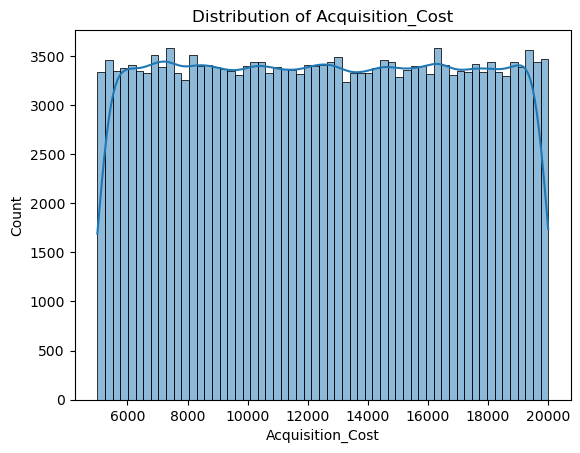

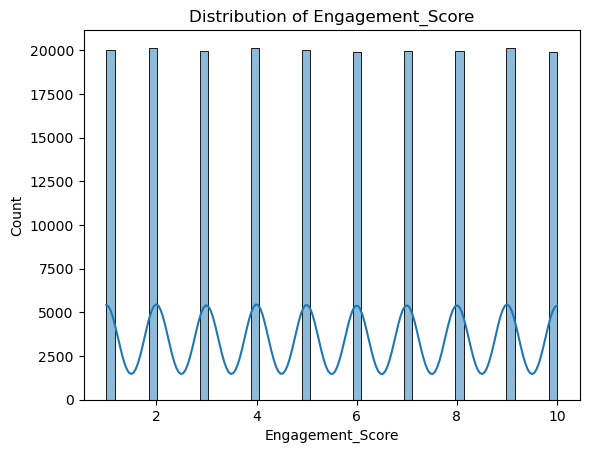

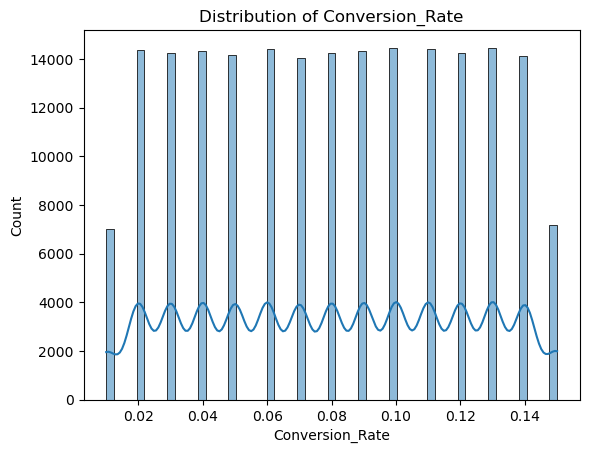

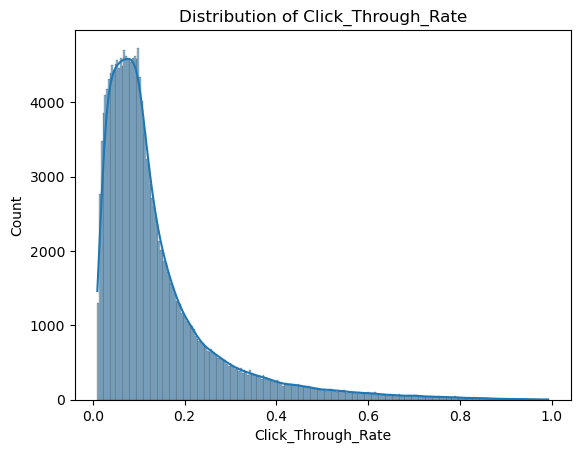

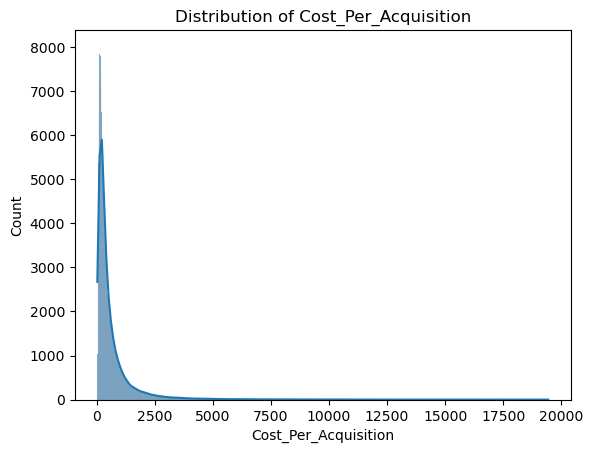

In [69]:
num_cols = ['Acquisition_Cost', 'Engagement_Score', 'Conversion_Rate', 'Click_Through_Rate', 'Cost_Per_Acquisition']
for col in num_cols:
    sns.histplot(df[col], kde=True)
    plot.title(f'Distribution of {col}')
    plot.show()

### Insights:
* The distribution of Acquisition Cost, Engagement Score and Conversion Rate appears to be uniformly distributed but the distributions of Click Through Rate and Cost Per Acquisiton appears to be right skewed.

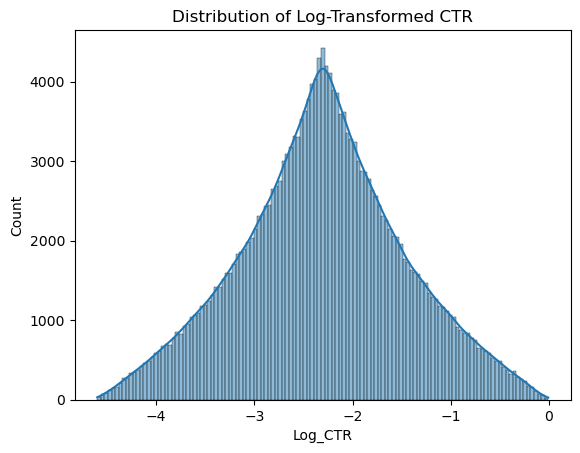

In [70]:
df['Log_CTR'] = np.log(df['Click_Through_Rate'] + 1e-5)
sns.histplot(df['Log_CTR'], kde=True)
plot.title("Distribution of Log-Transformed CTR")
plot.show()

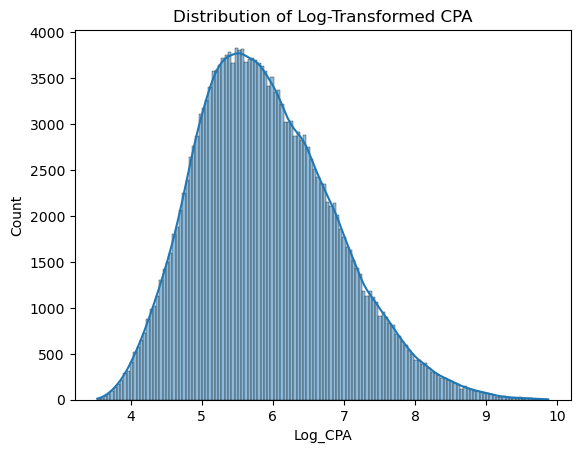

In [74]:
df['Log_CPA'] = np.log(df['Cost_Per_Acquisition'] + 1e-5)
sns.histplot(df['Log_CPA'], kde=True)
plot.title("Distribution of Log-Transformed CPA")
plot.show()

In [73]:
from scipy.stats import shapiro, normaltest

shapiro(df['Log_CTR'].sample(5000))  
normaltest(df['Log_CTR'])            

NormaltestResult(statistic=306.2078781271179, pvalue=3.219616222976335e-67)

In [75]:
shapiro(df['Log_CPA'].sample(5000))  
normaltest(df['Log_CPA'])   

NormaltestResult(statistic=6849.5148935046245, pvalue=0.0)

### Insights:
* As per the distributions, both Click-Through Rate (CTR) and Cost Per Acquisition (CPA) were highly right-skewed, indicating that a small number of campaigns had unusually high values. To reduce skewness and approximate a normal distribution which is essential for many statistical methods like z-scores and hypothesis testing, we applied a log transformation to both variables.
* After transformation, the distribution of Log CTR visually resembled a bell curve. Similarly, Log CPA also showed a more symmetric, improved distribution. However, Shapiro-Wilk normality tests performed on random samples (n = 5,000) for both Log CTR and Log CPA yielded p-values close to zero, confirming that the data is not strictly normal.
* Despite this, both distributions are approximately normal, which is sufficient for practical purposes. Therefore, we can proceed with parametric statistical techniques like empirical rule, z-score-based outlier detection, confidence intervals and hypothesis testing to draw meaningful and valid conclusions.

### Why are we doing this analysis?
* We are analyzing Click-Through Rate and Cost Per Acquistion to identify user behavior and campaign effectivenes, detect outliers, prepare for statistical testing like confidence intervals and hypothesis testing and make data driven decisions.

### Why did we apply log transformation?
* CTR and CPA were right skewed indicating most values were low and very few high values were pulling the distribution to the right.
* Right skewed data violates assumptions of many statistical methods which require normality.
* So, we applied log transformation to compress high values, spread out low values and make the distribution closer to normal.
* This will help us apply z-scores and empirical rules and proceed with further methods like confidence intervals and hypothesis testing.

### Empirical Rule
* Since, both the log transformation of CTR and CPA are approximately normal or bell-shaped, we can apply the empirical rule.
* As per the empirical rule:
* 1. 68% of values fall within 1 standard deviation of the mean
  2. 95% of values fall within 2 standard deviation of the mean
  3. 99.7% of values fall within 3 standard deviation of the mean

In [76]:
# calculating mean and standard deviation
cpa_mean = df['Log_CPA'].mean()
ctr_mean = df['Log_CTR'].mean()

cpa_std = df['Log_CPA'].std()
ctr_std = df['Log_CTR'].std()

print('CPA Mean:', cpa_mean, 'CTR Mean:', ctr_mean, 'CPA Standard Deviation:', cpa_std, 'CTR Standard Deviation:', ctr_std)

CPA Mean: 5.910694721604486 CTR Mean: -2.3048210109496616 CPA Standard Deviation: 0.975170314274365 CTR Standard Deviation: 0.8313190099225303


In [79]:
# For CPA (68%)
cpa_lower1 = cpa_mean - 1*cpa_std
cpa_upper1 = cpa_mean + 1*cpa_std

((df['Log_CPA'] >= cpa_lower1) & (df['Log_CPA'] <= cpa_upper1)).mean()

0.680295

In [80]:
# For CPA (95%)
cpa_lower2 = cpa_mean - 2*cpa_std
cpa_upper2 = cpa_mean + 2*cpa_std

((df['Log_CPA'] >= cpa_lower2) & (df['Log_CPA'] <= cpa_upper2)).mean()

0.959375

In [81]:
# For CPA (95%)
cpa_lower3 = cpa_mean - 3*cpa_std
cpa_upper3 = cpa_mean + 3*cpa_std

((df['Log_CPA'] >= cpa_lower3) & (df['Log_CPA'] <= cpa_upper3)).mean()

0.99595

In [82]:
# For CTR (68%)
ctr_lower1 = ctr_mean - 1*ctr_std
ctr_upper1 = ctr_mean + 1*ctr_std

((df['Log_CTR'] >= ctr_lower1) & (df['Log_CTR'] <= ctr_upper1)).mean()

0.68088

In [84]:
# For CTR (95%)
ctr_lower2 = ctr_mean - 2*ctr_std
ctr_upper2 = ctr_mean + 2*ctr_std

((df['Log_CTR'] >= ctr_lower2) & (df['Log_CTR'] <= ctr_upper2)).mean()

0.947805

In [85]:
# For CTR (99%)
ctr_lower3 = ctr_mean - 3*ctr_std
ctr_upper3 = ctr_mean + 3*ctr_std

((df['Log_CTR'] >= ctr_lower3) & (df['Log_CTR'] <= ctr_upper3)).mean()

1.0

### Insights:
* Values of 68.02%, 95.93% & 99.59% for CPA are almost equal to the values the empirical rule suggests: 68%, 95% & 99.7%.
* Values of 68.08%, 94.78% & 100% for CTR are almost equal to the values the empirical rule suggests: 68%, 95% & 99.7%.
* These results confirm that our log-transformed CPA and CTR values are close enough to a normal distribution. Even though the Shapiro-Wilk test earlier told us the data isn’t perfectly normal, it behaves 'normal enough' for us to confidently move forward with: Z-score calculation for identifying outliers, Confidence intervals to estimate population values & Hypothesis testing for making data-driven decisions.
* We can also conclude that the data follows the bell curve well enough, so we can now apply powerful statistical methods to gain more insights and make reliable predictions.
* This also reassures us that the log transformation we applied earlier worked effectively and now we’re ready for deeper analysis.

### Computing Z-Score

In [86]:
df['Z_Log_CPA'] = stats.zscore(df['Log_CPA'])
df['Z_Log_CTR'] = stats.zscore(df['Log_CTR'])
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,...,Gender,Age_Group,Conversions,Click_Through_Rate,Cost_Per_Click,Cost_Per_Acquisition,Log_CTR,Log_CPA,Z_Log_CPA,Z_Log_CTR
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,16174.0,6.29,Chicago,...,Men,18-24,20.24,0.263267,31.964427,799.110672,-1.334547,6.683499,0.792484,1.167153
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,11566.0,5.61,New York,...,Women,35-44,13.92,0.015419,99.706897,830.890805,-4.171482,6.722498,0.832476,-2.245426
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,10200.0,7.18,Los Angeles,...,Men,25-34,40.88,0.075864,17.465753,249.510763,-2.578683,5.519502,-0.401154,-0.329432
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,12724.0,5.55,Miami,...,All,All Ages,23.87,0.119231,58.635945,533.054043,-2.126611,6.278623,0.377297,0.214371
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,16452.0,6.50,Los Angeles,...,Men,25-34,18.95,0.090217,43.408971,868.179420,-2.405431,6.766398,0.877494,-0.121025


In [89]:
df[(df['Z_Log_CPA'] > 3) | (df['Z_Log_CPA'] < -3)]

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,...,Gender,Age_Group,Conversions,Click_Through_Rate,Cost_Per_Click,Cost_Per_Acquisition,Log_CTR,Log_CPA,Z_Log_CPA,Z_Log_CTR
93,94,NexGen Systems,Display,Men 25-34,45 days,Instagram,0.01,14438.0,7.19,New York,...,Men,25-34,1.47,0.022626,98.217687,9821.768707,-3.788221,9.192356,3.365228,-1.784398
179,180,Alpha Innovations,Display,Women 35-44,30 days,Google Ads,0.01,16862.0,6.29,Chicago,...,Women,35-44,2.00,0.132188,84.310000,8431.000000,-2.023457,9.039671,3.208654,0.338456
199,200,TechCorp,Influencer,Men 25-34,30 days,Google Ads,0.02,16312.0,2.63,Chicago,...,Men,25-34,2.34,0.026555,139.418803,6970.940171,-3.628172,8.849505,3.013646,-1.591873
475,476,Innovate Industries,Search,Women 35-44,45 days,YouTube,0.02,17467.0,5.48,Houston,...,Women,35-44,2.40,0.014076,145.558333,7277.916667,-4.262556,8.892600,3.057838,-2.354981
957,958,Innovate Industries,Influencer,Men 18-24,30 days,Email,0.01,17455.0,6.33,Los Angeles,...,Men,18-24,2.35,0.024112,74.276596,7427.659574,-3.724612,8.912966,3.078723,-1.707882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199524,199525,Alpha Innovations,Display,All Ages,30 days,Instagram,0.01,18914.0,6.13,Los Angeles,...,All,All Ages,1.80,0.058670,105.077778,10507.777778,-2.835654,9.259871,3.434461,-0.638545
199604,199605,DataTech Solutions,Display,Men 18-24,45 days,Google Ads,0.01,15694.0,4.96,Chicago,...,Men,18-24,1.59,0.031006,98.704403,9870.440252,-3.473244,9.197300,3.370297,-1.405509
199788,199789,DataTech Solutions,Display,Men 18-24,30 days,Email,0.01,18588.0,5.89,Houston,...,Men,18-24,2.15,0.023111,86.455814,8645.581395,-3.767022,9.064804,3.234427,-1.758897
199886,199887,NexGen Systems,Display,Men 25-34,60 days,Website,0.01,11153.0,4.38,New York,...,Men,25-34,1.49,0.026741,74.852349,7485.234899,-3.621189,8.920688,3.086641,-1.583473


In [90]:
df[(df['Z_Log_CTR'] > 3) | (df['Z_Log_CTR'] < -3)]

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,...,Gender,Age_Group,Conversions,Click_Through_Rate,Cost_Per_Click,Cost_Per_Acquisition,Log_CTR,Log_CPA,Z_Log_CPA,Z_Log_CTR


In [92]:
# calculating outliers
cpa_outliers = df[(df['Z_Log_CPA'] > 3) | (df['Z_Log_CPA'] < -3)]
ctr_outliers = df[(df['Z_Log_CTR'] > 3) | (df['Z_Log_CTR'] < -3)]

print(f'Outliers in CPA: {len(cpa_outliers)}')
print(f'Outliers in CTR: {len(ctr_outliers)}')

Outliers in CPA: 810
Outliers in CTR: 0


### Insights:
* As per the z-score method,if your z-score is greater than +3 and less than -3 then it is considered an outlier.
* Cost Per Acquisition (CPA) had 810 outliers, meaning there were several campaigns where the cost was unusually high or low compared to the average.
* Click-Through Rate (CTR) had 0 outliers, suggesting that CTR values are consistent and stable across campaigns after transformation.
* For CPA, some campaigns cost way more or way less to acquire a customer than the average.
* For CTR, the engagement rate (clicks on ads) is mostly similar across all campaigns, no extreme behavior was found.
* CPA outliers might indicate campaigns that are not cost-effective or highly profitable, they deserve a deeper look.
* CTR stability suggests that ad engagement is generally well-optimized and not influenced by outlier behavior.

Text(0.5, 0, 'Z Score of Log CPA')

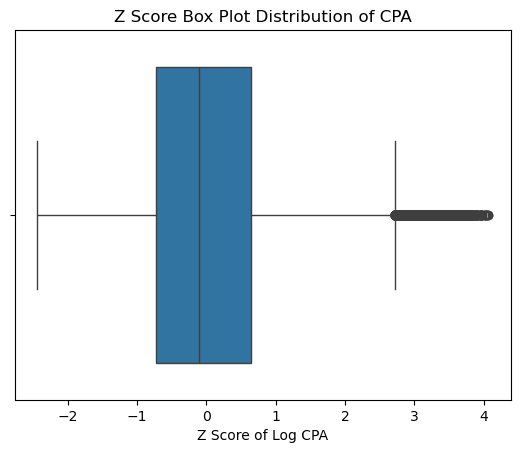

In [98]:
# plotting outliers of CPA
sns.boxplot(x=df['Z_Log_CPA'])
plot.title('Z Score Box Plot Distribution of CPA')
plot.xlabel('Z Score of Log CPA')

Text(0.5, 0, 'Z Score of Log CTR')

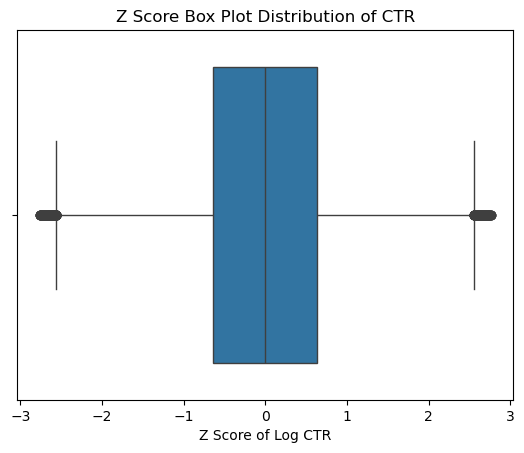

In [99]:
# plotting outliers of CTR
sns.boxplot(x=df['Z_Log_CTR'])
plot.title('Z Score Box Plot Distribution of CTR')
plot.xlabel('Z Score of Log CTR')

### Insights:
* From the box plots, we can clearly observe that CPA contains a significant number of outliers, whereas CTR appears well-distributed without any noticeable outliers.

### Confidence Level Estimation
* Assuming confidence level of 95%

In [101]:
standard_error_cpa = stats.sem(df['Log_CPA'])
ci_cpa = stats.norm.interval(0.95, loc=cpa_mean, scale=standard_error_cpa)

print(f'95% Confidence Interval for Log CPA mean: {ci_cpa}')

95% Confidence Interval for Log CPA mean: (5.906420927797673, 5.9149685154112985)


In [102]:
standard_error_ctr = stats.sem(df['Log_CTR'])
ci_ctr = stats.norm.interval(0.95, loc=ctr_mean, scale=standard_error_ctr)

print(f'95% Confidence Interval for Log CTR mean: {ci_ctr}')

95% Confidence Interval for Log CTR mean: (-2.308464360202696, -2.3011776616966273)


* Assuming confidence level of 99%

In [103]:
standard_error_cpa = stats.sem(df['Log_CPA'])
ci_cpa = stats.norm.interval(0.99, loc=cpa_mean, scale=standard_error_cpa)

print(f'99% Confidence Interval for Log CPA mean: {ci_cpa}')

99% Confidence Interval for Log CPA mean: (5.905078004454707, 5.916311438754264)


In [104]:
standard_error_ctr = stats.sem(df['Log_CTR'])
ci_ctr = stats.norm.interval(0.99, loc=ctr_mean, scale=standard_error_ctr)

print(f'99% Confidence Interval for Log CTR mean: {ci_ctr}')

99% Confidence Interval for Log CTR mean: (-2.309609183509491, -2.300032838389832)


### Insights:
* We calculated both 95% and 99% confidence intervals for the mean values of the log-transformed CPA and CTR metrics. Here's what we found:
* For Log CPA: The mean is 5.91, the 95% CI is between **5.906 and 5.915** and the 99% CI is between **5.905 and 5.916**.
*  For Log CTR: The mean is -2.30, the 95% CI is between **-2.308 and -2.301** and the 99% CI is between **-2.310 and -2.300**.
*  We can be 95% to 99% confident that the true average value of log CPA and log CTR lies within the respective ranges.
*  The intervals are very narrow, which suggests our dataset is large and consistent, the average values are stable and reliable.
*  This also means we’ve successfully transformed skewed data into something statistically meaningful—we can now apply hypothesis testing or compare groups with more confidence.
*  A stable average CPA gives us a benchmark for cost-efficiency & a reliable average CTR helps track engagement performance. By knowing these ranges with confidence, businesses can better set targets, spot unusual patterns or optimize campaign strategy.

### Hypothesis Testing on Log CPA
* **Business Question**: Is the average Cost Per Acquisition (CPA) significantly different from ₹300?
* **Assumption**: Since we applied log transformation, we test against the log of ₹300 using one sample test.
* **Null Hypothesis (H₀)**: The average Log CPA is equal to log(300).
* **Alternative Hypothesis (H₁)**: The average Log CPA is not equal to log(300).

In [107]:
assumed_cpa = 300
log_assumed_cpa = np.log(assumed_cpa)

tstat_cpa, pvalue_cpa = stats.ttest_1samp(df['Log_CPA'], log_assumed_cpa)
print(f't-statistic: {tstat_cpa}, pvalue: {pvalue_cpa}')

t-statistic: 94.8900602861087, pvalue: 0.0


### Hypothesis Testing on Log CTR
* **Business Question**: Is the average Click-Through Rate (CTR) significantly different from 10% (0.10)?
* **Assumption**: We log-transform the benchmark CTR as well.
* **Null Hypothesis (H₀)**: The average Log CTR is equal to log(0.10).
* **Alternative Hypothesis (H₁)**: The average Log CTR is not equal to log(0.10).

In [109]:
assumed_ctr = 0.1
log_assumed_ctr = np.log(assumed_ctr)

tstat_ctr, pvalue_ctr = stats.ttest_1samp(df['Log_CTR'], log_assumed_ctr)
print(f't-statistic: {tstat_ctr}, pvalue: {pvalue_ctr}')

t-statistic: -1.2028269487873366, pvalue: 0.22904471788855782


### Insights:
* Since the p-value is extremely small (0.0) and much less than 0.05 for CPA, we reject the null hypothesis.
* This means the average Cost Per Acquisition is significantly different from our assumed value of ₹300.
* The campaigns are not performing around ₹300 per acquisition, it's either much higher or lower, which needs further business evaluation.
* Since the p-value is greater than 0.05 for CTR, we fail to reject the null hypothesis.
*  This means the average CTR is not significantly different from our assumed value of 10%.
*  Campaigns are performing close to the expected CTR of 10% and there's no strong evidence to say otherwise.
*  CPA shows a significant variation, suggesting we may need to optimize cost-related factors in marketing.
*  CTR is aligned with expectations, so we can focus our attention more on reducing acquisition costs.

In [112]:
df.to_csv('CleanedMarketingCampaign.csv', index=False)